In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface
import spikeinterface.full as si
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import spikeinterface.postprocessing as sp
import spikeinterface.preprocessing as spre
import spikeinterface.qualitymetrics as qm
#import helper_functions as helper

In [ ]:
'''some change is done second attempt'''

In [2]:
import os
#give path to the IPN Analysis
path = '/home/benshalom/MEA_Analysis/IPNAnalysis'
os.chdir(path)


In [ ]:
pip show ipympl


Name: ipympl
Version: 0.9.3
Summary: Matplotlib Jupyter Extension
Home-page: http://matplotlib.org
Author: Matplotlib Development Team
Author-email: matplotlib-users@python.org
License: BSD License
Location: /home/miniconda3/lib/python3.8/site-packages
Requires: ipython, ipython-genutils, ipywidgets, matplotlib, numpy, pillow, traitlets
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Reading the file, BP filtering
local_path= '/home/benshalom/Data/KCNT1_MEASlices_06062025_CA_PS/250606/M07896/Network/000005/data.raw.h5' #network data from chip 16848
recording1 = se.read_maxwell(local_path,stream_id = 'well001') # starts with well0 so make sure to use the right one
freq_min = 300
freq_max = 4500


#recording = si.ConcatenateSegmentRecording([recording1,recording2])
channel_ids = recording1.get_channel_ids()
fs = recording1.get_sampling_frequency()
num_chan = recording1.get_num_channels()
num_seg = recording1.get_num_segments()
total_recording = recording1.get_total_duration()

#print('Channel ids:', channel_ids)
print('Sampling frequency:', fs)
print('Number of channels:', num_chan)
print('Number of segments:', num_seg)
print(f"total_recording: {total_recording} s")

recording_bp = spre.bandpass_filter(recording1, freq_min=freq_min, freq_max=freq_max)

recodring_cmr = spre.common_reference(recording_bp, reference='global', operator='median')
#recording_chunk = recodring_cmr.frame_slice(start_frame= 1*fs,end_frame=425*fs)
recording_chunk = recodring_cmr.frame_slice(start_frame= 0*fs,end_frame=300*fs)
print(f"chunk duration: {recording_chunk.get_total_duration()} s")



Sampling frequency: 10000.0
Number of channels: 924
Number of segments: 1
total_recording: 1200.04 s
chunk duration: 300.0 s


In [4]:
electrodes = []
channel_location_dict = {}
channel_ids = recording_chunk.get_channel_ids()
locations = recording_chunk.get_channel_locations()
for channel,locations in zip(channel_ids, locations):
    electrodes.append(220* int(locations[1]/17.5)+int(locations[0]/17.5))

    # Convert the coordinates to the desired format
    # Assuming the coordinates are in micrometers and you want to convert them to millimeters
    # Adjust the conversion factor as needed
    # For example, if the coordinates are in micrometers, divide by 1000 to convert to millimeters
    # Here we assume a 17.5 mm grid for the electrodes

print(electrodes)
print(len(electrodes))

[8960, 11846, 4555, 16224, 12269, 13815, 9385, 19108, 5431, 15786, 9389, 14257, 11835, 15142, 9831, 11400, 12249, 13377, 7442, 11404, 12245, 13373, 9827, 10964, 14260, 12724, 10269, 15137, 11393, 12720, 5435, 16248, 11389, 9855, 10265, 11402, 8984, 12291, 10935, 11844, 10955, 12282, 15771, 11848, 11369, 18220, 13388, 12284, 11829, 8975, 11373, 15811, 9868, 12700, 16209, 12286, 10931, 11840, 15795, 8991, 13802, 8537, 11811, 13369, 8513, 11411, 11815, 19542, 13806, 12258, 7860, 12728, 13364, 10960, 8507, 9871, 14680, 11824, 12253, 16691, 13820, 11820, 7880, 15146, 14246, 12704, 13800, 14268, 14242, 12717, 12691, 14249, 8945, 5471, 12695, 10291, 12266, 14238, 11384, 13804, 7000, 9387, 13831, 5427, 10295, 12277, 19546, 4985, 9853, 8509, 16251, 13366, 18666, 13360, 16246, 13362, 9857, 12715, 19984, 9415, 9417, 11842, 11386, 13798, 18657, 4573, 16673, 11408, 5015, 16231, 16240, 8531, 17095, 19111, 13386, 19518, 23057, 6560, 14686, 17551, 5457, 14682, 15109, 6568, 15797, 17555, 14708, 18638, 

In [5]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

import spikeinterface.widgets as sw
import matplotlib.pyplot as plt
%matplotlib widget

# Visualize the traces interactively
print("Visualizing traces interactively...")
sw.plot_traces(recording_chunk, mode='line',show_channel_ids=True, backend='ipywidgets')  # Updated function name

# Create a text box for user input
electrode_input = widgets.Text(
    description="Electrode:",
    placeholder="Enter electrode number",
)

# Create an output widget to display the result
output = widgets.Output()

# Define a function to handle the input and display the corresponding channel indices
def find_channel_indices(change):
    with output:
        output.clear_output()  # Clear previous output
        try:
            # Get the input value and split it into a list of electrode numbers
            electrode_numbers = [int(e.strip()) for e in change["new"].split(",")]
            channel_indices = []
            for electrode_number in electrode_numbers:
                if electrode_number in electrodes:
                    channel_index = electrodes.index(electrode_number)  # Find the index
                    channel_indices.append(channel_index)
                else:
                    print(f"Electrode {electrode_number} not found.")
            if channel_indices:
                print(f"Electrode numbers {electrode_numbers} correspond to Channel Indices {channel_indices}")
        except ValueError:
            print("Please enter valid integers separated by commas.")

# Attach the function to the text box
electrode_input.observe(find_channel_indices, names="value")

# Display the widgets
display(widgets.VBox([electrode_input, output]))



Visualizing traces interactively...


AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [6]:
locations = recording_chunk.get_channel_locations()
print(locations.shape)
channel_ids = recording_chunk.get_channel_ids()
print(channel_ids.shape)

(924, 2)
(924,)


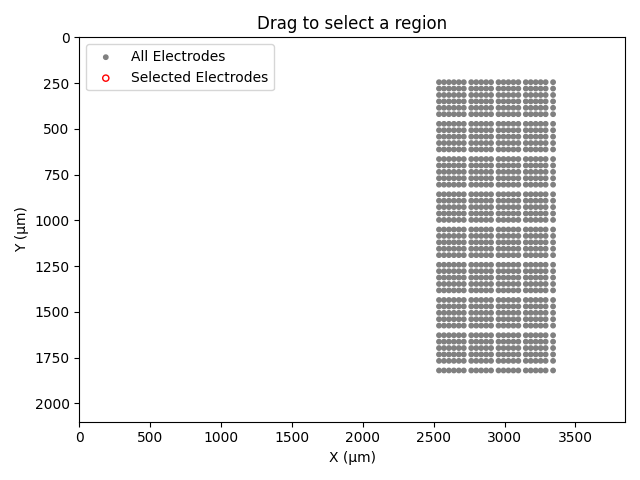

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display
import os

# Enable interactive matplotlib
%matplotlib widget

# Ensure required variables are defined
# Replace these with your actual data
locs = recording_chunk.get_channel_locations()  # 2D locations of electrodes
channel_ids = recording_chunk.get_channel_ids()  # Channel IDs
electrodes = np.array(electrodes)  # List of electrode IDs

# Widgets to enter electrode IDs to highlight
highlight_input = widgets.Text(
    description='Highlight:',
    placeholder='e.g. 10, 15, 23',
    layout=widgets.Layout(width='50%')
)

highlight_button = widgets.Button(
    description='Highlight Electrodes',
    button_style='info'
)

# Setup figure
fig, ax = plt.subplots()

# Initial colors: all gray
c = np.array(['gray'] * len(electrodes))

def update_highlight_colors(electrodes_to_highlight):
    global c
    c = np.array(['gray'] * len(electrodes))
    highlight_mask = np.isin(electrodes, electrodes_to_highlight)
    c[highlight_mask] = 'blue'
    sc.set_color(c)
    fig.canvas.draw_idle()

# Scatter plot of electrode locations
sc = ax.scatter(locs[:, 0], locs[:, 1], c=c, label='All Electrodes', s=10)
ax.set_title("Drag to select a region")
ax.set_xlabel("X (μm)")
ax.set_ylabel("Y (μm)")

# Invert the y-axis to match typical electrode layouts
ax.invert_yaxis()

# Scatter plot for selected points
selected_plot = ax.scatter([], [], facecolors='none', edgecolors='red', linewidths=1, s=20, label='Selected Electrodes')
selected_electrodes = []

# Create an output widget for displaying messages
output = widgets.Output()

# Function to map electrodes to channel numbers
def map_electrodes_to_channels(electrode_list):
    channel_numbers = []
    for electrode in electrode_list:
        if electrode in electrodes:
            channel_index = electrodes.tolist().index(electrode)  # Find the index of the electrode
            channel_numbers.append(channel_ids[channel_index])  # Map to channel number
        else:
            print(f"Electrode {electrode} not found.")
    return list(map(int, channel_numbers))

# Selection callback with cumulative selection
def onselect(eclick, erelease):
    global selected_electrodes
    if eclick.xdata is None or erelease.xdata is None:  # Ignore clicks outside the plot
        return

    x0, y0 = eclick.xdata, eclick.ydata
    x1, y1 = erelease.xdata, erelease.ydata

    # Mask to find electrodes within the selected region
    mask = (
        (locs[:, 0] > min(x0, x1)) & (locs[:, 0] < max(x0, x1)) &
        (locs[:, 1] > min(y0, y1)) & (locs[:, 1] < max(y0, y1))
    )
    new_selection = electrodes[mask]

    # Check if Ctrl key is pressed (use event modifiers)
    if eclick.key == 'control':  # Append to existing selection
        selected_electrodes = np.unique(np.concatenate((selected_electrodes, new_selection)))
    else:  # Overwrite selection
        selected_electrodes = new_selection

    # Update the scatter plot for selected electrodes
    selected_plot.set_offsets(locs[np.isin(electrodes, selected_electrodes)])
    fig.canvas.draw_idle()

    # Display the selection details in the output widget
    with output:
        output.clear_output()  # Clear previous messages
        print(f"🔴 Selected {len(selected_electrodes)} electrodes")
        print(selected_electrodes)
        mapped_channels = map_electrodes_to_channels(selected_electrodes)
        print("Mapped Channels:", mapped_channels)
# Create RectangleSelector
selector = RectangleSelector(
    ax, onselect,
    interactive=True,
    useblit=True,
    button=[1]  # Left mouse button
)

# Create save button
save_button = widgets.Button(
    description="💾 Save Selected Electrodes",
    button_style='success',
    tooltip='Save selected electrode IDs to file'
)

def on_highlight_button_click(b):
    with output:
        output.clear_output()
        try:
            input_text = highlight_input.value.strip()
            if input_text == "":
                print("No electrodes entered.")
                return
            electrodes_to_highlight = np.array([int(x.strip()) for x in input_text.split(',')])
            update_highlight_colors(electrodes_to_highlight)
            print(f"🔵 Highlighted electrodes: {electrodes_to_highlight}")
        except Exception as e:
            print(f"Error parsing input: {e}")

highlight_button.on_click(on_highlight_button_click)

# Define callback to save to file
def save_selected_electrodes_to_file(b):
    if len(selected_electrodes) == 0:
        with output:
            output.clear_output()
            print("No electrodes selected to save.")
        return

    save_path = "selected_electrodes.txt"
    with open(save_path, "w") as f:
        for el in selected_electrodes:
            f.write(f"{el}\n")

    with output:
        output.clear_output()
        print(f"Saved {len(selected_electrodes)} electrode IDs to {os.path.abspath(save_path)}")

# Attach callback and show button
save_button.on_click(save_selected_electrodes_to_file)

# Display all controls
display(widgets.VBox([
    widgets.HBox([highlight_input, highlight_button]),
    save_button,
    output
]))
plt.xlim([0,3850])
plt.ylim(2100,0)

plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Function to map channel numbers to electrode numbers
def map_channels_to_electrodes(channel_list):
    electrode_numbers = []
    for channel in channel_list:
        if channel in channel_ids.astype(int):
            channel_index = np.where(channel_ids.astype(int) == channel)[0][0]  # Find the index of the channel
            electrode_numbers.append(electrodes[channel_index])  # Map to electrode number
        else:
            print(f"Channel {channel} not found.")
    return electrode_numbers

# Example usage
input_channels = [442, 399, 262, 225, 209]  # Replace with your desired channel numbers
mapped_electrodes = map_channels_to_electrodes(input_channels)
print("Mapped Electrodes:", mapped_electrodes)

Mapped Electrodes: [16233, 19529, 14706, 6128, 10971]


In [9]:
# Function to map electrodes to channel numbers
def map_electrodes_to_channels(electrode_list):
    channel_numbers = []
    for electrode in electrode_list:
        if electrode in electrodes:
            channel_index = electrodes.tolist().index(electrode)  # Find the index of the electrode
            channel_numbers.append(channel_ids[channel_index])  # Map to channel number
        else:
            print(f"Electrode {electrode} not found.")
    return channel_numbers

# Example usage
user_electrode_list = [8960, 11846, 4555, 16224, 12269, 13815, 9385, 19108, 5431, 15786, 9389, 14257,
11835, 15142, 9831, 11400, 12249, 13377, 7442, 11404, 12245, 13373, 9827, 10964,
14260, 12724, 10269, 15137, 11393, 12720, 5435, 16248, 11389, 9855, 10265, 11402,
8984, 12291, 10935, 11844, 10955, 12282, 15771, 11848, 11369, 18220, 13388, 12284,
11829, 8975, 11373, 15811, 9868, 12700, 16209, 12286, 10931, 11840, 15795, 8991,
13802, 8537, 11811, 13369, 8513, 11411, 11815, 19542, 13806, 12258, 7860, 12728,
13364, 10960, 8507, 9871, 14680, 11824, 12253, 16691, 13820, 11820, 7880, 15146,
14246, 12704, 13800, 14268, 14242, 12717, 12691, 14249, 8945, 5471, 12695, 10291,
12266, 14238, 11384, 13804, 7000, 9387, 13831, 5427, 10295, 12277, 19546, 4985,
9853, 8509, 16251, 13366, 18666, 13360, 16246, 13362, 9857, 12715, 19984, 9415,
9417, 11842, 11386, 13798, 18657, 4573, 16673, 11408, 5015, 16231, 16240, 8531,
17095, 19111, 13386, 19518, 23057, 6560, 14686, 17551, 5457, 14682, 15109, 6568,
15797, 17555, 14708, 18638, 15133, 14700, 16671, 21971, 7006, 15767, 18231, 6122,
18200, 14695, 13382, 21927, 14691, 3257, 16229, 21955, 8964, 7886, 16655, 14271,
7420, 12280, 14253, 10280, 7882, 19522, 17562, 8546, 4137, 10289, 15806, 9406,
10308, 8971, 17128, 12273, 8551, 16215, 17124, 4575, 15773, 16682, 12713, 10971,
15775, 13391, 7444, 11818, 16686, 11382, 9413, 16244, 9426, 11851, 19526, 13795,
8951, 6128, 15120, 16666, 14266, 14678, 19537, 8535, 16213, 15802, 6984, 8969,
9835, 17571, 6100, 9411, 14240, 12288, 10302, 13828, 8533, 17131, 10306, 10940,
8529, 10966, 4551, 12731, 8955, 14711, 6544, 22365, 13375, 4591, 14706, 22389,
7866, 17111, 17120, 7888, 15789, 13811, 7451, 16207, 17546, 3711, 17549, 18195,
8548, 14264, 21091, 5462, 13826, 21066, 6562, 15124, 21531, 11406, 7426, 21082,
7008, 16669, 21086, 6542, 13371, 18215, 10968, 15148, 10275, 18211, 7858, 12702,
18653, 5466, 10938, 15782, 6120, 18649, 3691, 19091, 10304, 14251, 19095, 5449,
10962, 3253, 17566, 8540, 19533, 5011, 18204, 16662, 6131, 18228, 4588, 19988,
9424, 19975, 6564, 19991, 6126, 18222, 14704, 19104, 4131, 13384, 20648, 8544,
16688, 3233, 4577, 11380, 15129, 9851, 3693, 14227, 20642, 12711, 7004, 21489,
21962, 11831, 7884, 15140, 19529, 3229, 3255, 15107, 19971, 9409, 8973, 18202,
21524, 4109, 6106, 18642, 22404, 7891, 17093, 16658, 7853, 3697, 12260, 20646,
7011, 16675, 21966, 6124, 15769, 22408, 6571, 12698, 15151, 8977, 16235, 21528,
5028, 15793, 18671, 6566, 16233, 19551, 9829, 7446, 10293, 22397, 10944, 19075,
7440, 17533, 19955, 5024, 16647, 17104, 5031, 17531, 20640, 7002, 19520, 15800,
4151, 18640, 16680, 9431, 18198, 17122, 10311, 19102, 14262, 11826, 16242, 9849,
21925, 16684, 5453, 14244, 20644, 8986, 15804, 7448, 19980, 3271, 17557, 17126,
4569, 19106, 11378, 15808, 4113, 4129, 18646, 22400, 9422, 10949, 21071, 21520,
7407, 3689, 16645, 20624, 3675, 4135, 11822, 19548, 9840, 6986, 14675, 18668,
10273, 8982, 13349, 18217, 17085, 9428, 13789, 23071, 6089, 7424, 20613, 19097,
9844, 3268, 14669, 21968, 7411, 9866, 16649, 20620, 17527, 4148, 18660, 19535,
5433, 3706, 14231, 22406, 15118, 6540, 17525, 21526, 17089, 4586, 15765, 23053,
10925, 4144, 18664, 17568, 11805, 3264, 17087, 21964, 7415, 9862, 21929, 21088,
4571, 4582, 13355, 23049, 5451, 3702, 13351, 22402, 15122, 7862, 17529, 21522,
11833, 5020, 14229, 21084, 17117, 4140, 16211, 12726, 11809, 3260, 17091, 21960,
15126, 7875, 13793, 21504, 3249, 6995, 16651, 23068, 11371, 8542, 18662, 22384,
11813, 3262, 14667, 23066, 16205, 5022, 20605, 21080, 5017, 4142, 19080, 17560,
4133, 8515, 20629, 19977, 12255, 12709, 18226, 17564, 12687, 5429, 16237, 23055,
9404, 5446, 20635, 18635, 14225, 9420, 19082, 21062, 11395, 5425, 21953, 15135,
10933, 7429, 19086, 23035, 12693, 3235, 15780, 14255, 12251, 6111, 19078, 23046,
14684, 6991, 18189, 17540, 9400, 7871, 21951, 18625, 12689, 4549, 13822, 16222,
11391, 3678, 19962, 17102, 5460, 4558, 10946, 23025, 11807, 5000, 21045, 19969,
10927, 6115, 17553, 21940, 11367, 4120, 18185, 17544, 6093, 4562, 17115, 23029,
11365, 3266, 13809, 16226, 6117, 3682, 13785, 17106, 8988, 4124, 16218, 20651,
7435, 5004, 9825, 14697, 10286, 3244, 14693, 19960, 6113, 3686, 23042, 17113,
10284, 4566, 13380, 23033, 7849, 6978, 19084, 19947, 10282, 3708, 14689, 19964,
9393, 4111, 20637, 17538, 7422, 4991, 16660, 18651, 6980, 3251, 17535, 16220,
6109, 8511, 18206, 17100, 6549, 4553, 15144, 23051, 7418, 4995, 14702, 18655,
10278, 4107, 13345, 23062, 9398, 4115, 13791, 17542, 14671, 10300, 21485, 21942,
9860, 9864, 20631, 22373, 15791, 3231, 19524, 19513, 8980, 5468, 21495, 23031,
6965, 5026, 21931, 20626, 7845, 4146, 21049, 19951, 9391, 10957, 15131, 21515,
6527, 5464, 14665, 23027, 3667, 4584, 20611, 21513, 4547, 3227, 16653, 20633,
4989, 6098, 12264, 19100, 6969, 8949, 18187, 20622, 7431, 9395, 21047, 23064,
7864, 3246, 21077, 19505, 7433, 6982, 19540, 22386, 3680, 4580, 20609, 16677,
4122, 6095, 23044, 23060, 4993, 7855, 10942, 19544, 6973, 6557, 18191, 13817,
12685, 9846, 19982, 21502, 8505, 3242, 23038, 22393, 6535, 7413, 13347, 22382,
12247, 3240, 18209, 21949, 10951, 6091, 21055, 21060, 3671, 7851, 14235, 12706,
10953, 7409, 21511, 22378, 8958, 6529, 19986, 21498, 8518, 3238, 15111, 20618,
6967, 7847, 21073, 19071, 8520, 4987, 18213, 19973, 12275, 6087, 14673, 19093,
8522, 3225, 15115, 22391, 6085, 9402, 18629, 19966, 6525, 8962, 19949, 19511,
3665, 9842, 16664, 6546, 3695, 6553, 18627, 13813, 9838, 3669, 17098, 19073,
12271, 11397, 19507, 19953, 3684, 8526, 19065, 22367, 8947, 17109, 21500, 20607,
6104, 8966, 22411, 19515, 6997, 6533, 21946, 18631, 7437, 10271, 19958, 19069,
7877, 4105, 21058, 22369, 3704, 8953, 19509, 18193, 6555, 6975, 13353, 21944,
6531, 13824, 18644, 21938, 7873, 5438, 21933, 19067, 4118, 4998, 21517, 21506,
5013, 10929, 19945, 15784, 9833, 6993, 21509, 20615, 3700, 4560, 22380, 12722,
6551, 5440, 21075, 22375, 5009, 5455, 14233, 21491, 7869, 5442, 21064, 21051,
6989, 5002, 13787, 18224, 6538, 5444, 15113, 21053, 13358, 11375, 15105, 18633,
3673, 4564, 21487, 21493, 8524, 5006, 21957, 21935, 6971, 10267, 23040, 15778,
12262, 4126, 21069, 19089, 11837, 4545, 22395, 19531, 6102, 7405, 22371, 10297]
mapped_channels = map_electrodes_to_channels(user_electrode_list)
print("Mapped Channels:", mapped_channels)

Mapped Channels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '125', '126', '127', '129', '130', '131', '133', '134', '135', '137', '138', '139', '141', '142', '143', '145', '146', '147', '149', '150', '151', '153', '154', '155', '157', '158', '159', '161', '162', '163', '165', '166', '167', '169',

In [9]:
print((recordingB.get_traces(start_frame=0, end_frame=int(recordingB.get_sampling_frequency()))))

NameError: name 'recordingB' is not defined

In [10]:
# Ensure fsB is defined
fsB = 10000.0  # Sampling frequency in Hz

start_time = 0      # in seconds
end_time = 60       # in seconds
start_frame = start_time * fsB
end_frame = end_time * fsB

# Get a large chunk — this will NOT crash your RAM due to memory-mapping
traces = recordingB.get_traces(start_frame=start_frame, end_frame=end_frame, segment_index=0)
print(f"Chunk shape: {traces.shape}")
print(f"Memory of loaded chunk: {traces.nbytes / 1e6:.2f} MB")


NameError: name 'recordingB' is not defined

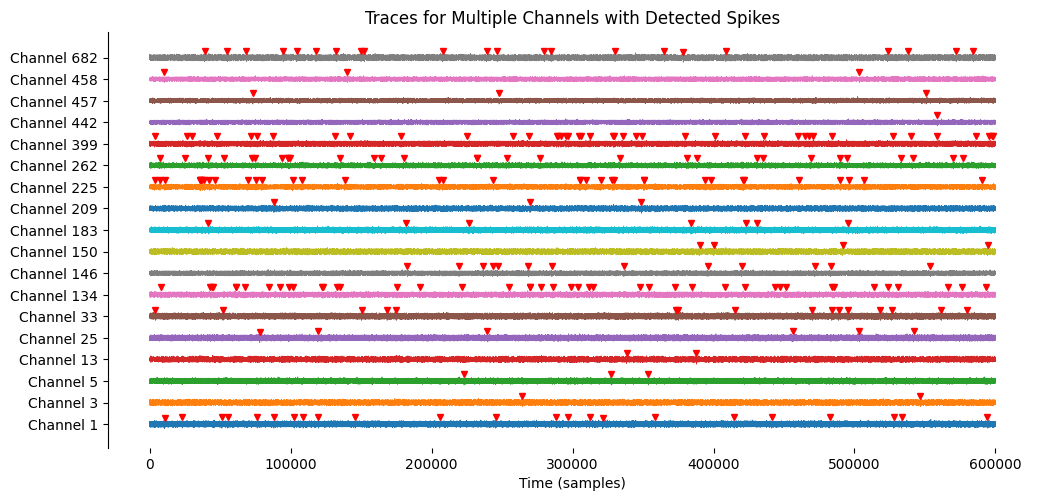

In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt

plt.close('all')  # Close all existing figures to prevent multiple plots

# Define the detect_peaks_stddev function
def detect_peaks_stddev(trace, peak_sign, std_multiplier):
    """
    Detect peaks in a signal based on standard deviation thresholding.

    Parameters:
    - trace: 1D numpy array, the signal to analyze
    - peak_sign: str, "pos" for positive peaks, "neg" for negative peaks
    - std_multiplier: float, the threshold multiplier for peak detection

    Returns:
    - peaks: numpy array, indices of detected peaks
    - threshold: float, the threshold value used for detection
    """
    mean = np.mean(trace)
    std = np.std(trace)
    threshold = mean + std_multiplier * std if peak_sign == "pos" else mean - std_multiplier * std

    if peak_sign == "pos":
        peaks = np.where((trace[1:-1] > trace[:-2]) & (trace[1:-1] > trace[2:]) & (trace[1:-1] > threshold))[0] + 1
    elif peak_sign == "neg":
        peaks = np.where((trace[1:-1] < trace[:-2]) & (trace[1:-1] < trace[2:]) & (trace[1:-1] < threshold))[0] + 1
    else:
        raise ValueError("peak_sign must be 'pos' or 'neg'")

    return peaks, threshold
%matplotlib inline
# Ensure channels_to_plot only contains valid indices within the bounds of the traces array
channels_to_plot = list(map(int, ['1', '3', '5', '13', '25', '33', '134', '146', '150', '183', '209', '225', '262', '399', '442', '457', '458', '682']))
fs = recording_chunk.get_sampling_frequency()
start_time = 40 # Start time in seconds
end_time = 100 # End time in seconds
# Get traces for the specified range
traces = recording_chunk.get_traces(start_frame=int(start_time*fs), end_frame=int(end_time*fs), segment_index=0, return_scaled=True)

# Define the channels you want to plot
 # Replace with the desired channel indices
#channels_to_plot = range(traces.shape[1])  # Example channel indices
# Parameters for spike detection
peak_sign = "neg"  # Detect negative peaks
std_multiplier = 4 # Threshold: 1 standard deviation from the mean
# Adjust figure height dynamically based on the number of channels
plt.figure(figsize=(12, len(channels_to_plot) * 0.3))  # Increase height for better spacing

# Extract channel IDs and 2D location coordinates
channel_ids = np.array([int(x) for x in recording_chunk.get_channel_ids()])
locs = recording_chunk.get_channel_locations()  # Define locs here
# Ensure channels_to_plot only contains valid indices within the bounds of the traces array
channels_to_plot_indices = [np.where(channel_ids == ch)[0][0] for ch in channels_to_plot if ch in channel_ids]

# Loop through the channels and plot each
yticks_positions = []  # Store y-axis positions for labeling
yticks_labels = []  # Store channel names for labeling

spike_times_channel = {}  # Store spike times for each channel
for i, channel_idx in enumerate(channels_to_plot_indices):
    # Get the trace for the current channel
    trace = traces[:, channel_idx]
    
    # Detect peaks using the detect_peaks function
    peaks_sample_inds, _ = detect_peaks_stddev(trace, peak_sign, std_multiplier)

    # Convert peaks_sample_inds to integers
    peaks_sample_inds = peaks_sample_inds.astype(int)
    spike_times_channel[channel_ids[channel_idx]] = peaks_sample_inds  # Store spike times for the channel

    spike_marker_offset = 100
    
    # Plot the trace with increased spacing
    plt.plot(
        trace + i * 200,  # Increase the offset to 200 for better spacing
        label=f'Channel {channel_ids[channel_idx]}',  # Use the actual channel ID for labeling
        rasterized=True,  # Rasterize the line plots for faster rendering
        linewidth=0.5  # Use thinner lines for better performance
    )
    
    # Mark the detected spikes with red triangles
    plt.plot(
        peaks_sample_inds, 
        trace[peaks_sample_inds] + i * 200 + spike_marker_offset,  # Match the increased offset
        'rv',  # Red triangles
        markersize=4, 
        label=f'Spikes Channel {channel_ids[channel_idx]}'
    )
    
    # Add y-axis tick position and label
    yticks_positions.append(i * 200)
    
    # Retrieve the x, y coordinates for the channel
    x, y = locs[channel_idx]  # Use the index to get the location
    yticks_labels.append(f'Channel {channel_ids[channel_idx]}')  # Format with coordinates

# Customize the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time (samples)')
plt.title('Traces for Multiple Channels with Detected Spikes')

# Add y-axis ticks with channel names and coordinates
plt.yticks(yticks_positions, yticks_labels)

# Save the plot as a PDF
output_path = './savetraces_multiple_channels_with_spikes.pdf'  # Replace with your desired path
plt.show() 
plt.savefig(output_path, format='pdf', bbox_inches='tight', dpi=150)  # Save with high resolution
plt.close()  # Close the plot to free memory

In [10]:

recordingB = se.read_binary(local_path, sampling_frequency=recording1.get_sampling_frequency(), num_channels=num_chan, dtype='float32', time_axis = 0)
fsB = recordingB.get_sampling_frequency()
print(fs) 
print(type(recordingB)) 

print(recordingB.get_traces(start_frame=0, end_frame=int(recordingB.get_sampling_frequency())).nbytes)




10000.0
<class 'spikeinterface.core.binaryrecordingextractor.BinaryRecordingExtractor'>
36960000


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate test data for demonstration (replace with actual recordingB.get_traces)
#np.random.seed(0)
fs = 3000 # Example sampling frequency
start_time = 40
end_time = 200
num_samples = int((end_time - start_time) * fs)

channel_ids = np.arange(1, 1025)

def detect_peaks_stddev(trace, peak_sign, std_multiplier):
    mean = np.mean(trace)
    std = np.std(trace)
    threshold = mean + std_multiplier * std if peak_sign == "pos" else mean - std_multiplier * std

    if peak_sign == "pos":
        peaks = np.where((trace[1:-1] > trace[:-2]) & (trace[1:-1] > trace[2:]) & (trace[1:-1] > threshold))[0] + 1
    elif peak_sign == "neg":
        peaks = np.where((trace[1:-1] < trace[:-2]) & (trace[1:-1] < trace[2:]) & (trace[1:-1] < threshold))[0] + 1
    else:
        raise ValueError("peak_sign must be 'pos' or 'neg'")
    return peaks, threshold

num_channels = len(channel_ids)
# Ensure recordingB is defined
recordingB = se.read_binary(local_path, sampling_frequency=recording1.get_sampling_frequency(), num_channels=num_chan, dtype='float32', time_axis=0)

# Get traces
traces = recording_chunk.get_traces(start_frame=0, end_frame=num_samples, segment_index=0) * 20

channels_to_plot_indices = range(num_chan)
spacing = 300
std_multiplier = 4
peak_sign = "neg"

plt.figure(figsize=(15, len(channels_to_plot_indices) * 0.3))
yticks_positions = []
yticks_labels = []

for i, channel_idx in enumerate(channels_to_plot_indices):
    trace = traces[:, channel_idx]
    offset = i * spacing
    trace_offset = trace + offset

    # Detect spikes
    peaks_sample_inds, _ = detect_peaks_stddev(trace, peak_sign, std_multiplier)
    plt.plot(trace_offset, linewidth=0.5, color='black', rasterized=True)
    plt.plot(
        peaks_sample_inds,
        trace[peaks_sample_inds] + offset,
        'rv',
        markersize=4
    )

    yticks_positions.append(offset)
    yticks_labels.append(f'Channel {channel_ids[i]}')

plt.yticks(yticks_positions, yticks_labels)
plt.xlabel('Time (samples)')
plt.title('Traces for Multiple Channels with Detected Spikes')
plt.tight_layout()
plt.show()


: 

: 

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = recordingB.get_sampling_frequency()

# Set start and end time in seconds
start_time = 40
end_time = 100
start_frame = int(start_time * fs)
end_frame = int(end_time * fs)

# Get full set of traces from recordingB
traces = recordingB.get_traces(start_frame=start_frame, end_frame=end_frame, segment_index=0)

# All channel IDs
channel_ids = recordingB.channel_ids
num_channels = len(channel_ids)

def detect_peaks_stddev(trace, peak_sign, std_multiplier):
    mean = np.mean(trace)
    std = np.std(trace)
    threshold = mean + std_multiplier * std if peak_sign == "pos" else mean - std_multiplier * std

    if peak_sign == "pos":
        peaks = np.where((trace[1:-1] > trace[:-2]) & (trace[1:-1] > trace[2:]) & (trace[1:-1] > threshold))[0] + 1
    elif peak_sign == "neg":
        peaks = np.where((trace[1:-1] < trace[:-2]) & (trace[1:-1] < trace[2:]) & (trace[1:-1] < threshold))[0] + 1
    else:
        raise ValueError("peak_sign must be 'pos' or 'neg'")
    return peaks, threshold

# Plot parameters
spacing = 300
std_multiplier = 4
peak_sign = "neg"
channels_to_plot_indices = range(num_channels)  # Plot all 1024 channels

plt.figure(figsize=(15, len(channels_to_plot_indices) * 0.3))
yticks_positions = []
yticks_labels = []

for i, channel_idx in enumerate(channels_to_plot_indices):
    trace = traces[:, channel_idx]
    offset = i * spacing
    trace_offset = trace + offset

    # Detect spikes
    peaks_sample_inds, _ = detect_peaks_stddev(trace, peak_sign, std_multiplier)

    plt.plot(trace_offset, linewidth=0.5, color='black', rasterized=True)
    plt.plot(
        peaks_sample_inds,
        trace[peaks_sample_inds] + offset,
        'rv',
        markersize=4
    )

    yticks_positions.append(offset)
    yticks_labels.append(f'Ch {channel_ids[channel_idx]}')

plt.yticks(yticks_positions, yticks_labels)
plt.xlabel('Time (samples)')
plt.title(f'Traces from {start_time}s to {end_time}s with Detected Spikes')
plt.tight_layout()
plt.show()


/tmp/ipykernel_19/1747984889.py:46: RuntimeWarning: invalid value encountered in add
  trace_offset = trace + offset
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asan

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f8bd4732940> (for post_execute):


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = recordingB.get_sampling_frequency()

# Set start and end time in seconds
start_time = 40
end_time = 100
start_frame = int(start_time * fs)
end_frame = int(end_time * fs)

# Get full set of traces from recordingB
traces = recordingB.get_traces(start_frame=start_frame, end_frame=end_frame, segment_index=0, return_scaled=True)

# All channel IDs
channel_ids = recordingB.channel_ids
num_channels = len(channel_ids)

def detect_peaks_stddev(trace, peak_sign, std_multiplier):
    mean = np.mean(trace)
    std = np.std(trace)
    threshold = mean + std_multiplier * std if peak_sign == "pos" else mean - std_multiplier * std

    if peak_sign == "pos":
        peaks = np.where((trace[1:-1] > trace[:-2]) & (trace[1:-1] > trace[2:]) & (trace[1:-1] > threshold))[0] + 1
    elif peak_sign == "neg":
        peaks = np.where((trace[1:-1] < trace[:-2]) & (trace[1:-1] < trace[2:]) & (trace[1:-1] < threshold))[0] + 1
    else:
        raise ValueError("peak_sign must be 'pos' or 'neg'")
    return peaks, threshold

# Plot parameters
spacing = 300
std_multiplier = 4
peak_sign = "neg"
channels_to_plot_indices = range(num_channels)  # Plot all 1024 channels

plt.figure(figsize=(15, len(channels_to_plot_indices) * 0.3))
yticks_positions = []
yticks_labels = []

for i, channel_idx in enumerate(channels_to_plot_indices):
    trace = traces[:, channel_idx]
    offset = i * spacing
    trace_offset = trace + offset

    # Detect spikes
    peaks_sample_inds, _ = detect_peaks_stddev(trace, peak_sign, std_multiplier)

    plt.plot(trace_offset, linewidth=0.5, color='black', rasterized=True)
    plt.plot(
        peaks_sample_inds,
        trace[peaks_sample_inds] + offset,
        'rv',
        markersize=4
    )

    yticks_positions.append(offset)
    yticks_labels.append(f'Ch {channel_ids[channel_idx]}')

plt.yticks(yticks_positions, yticks_labels)
plt.xlabel('Time (samples)')
plt.title(f'Traces from {start_time}s to {end_time}s with Detected Spikes')
plt.tight_layout()
plt.show()


/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:215: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/home/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/tmp/ipykernel_769/2332009449.py:78: RuntimeWarning: invalid value encountered in add
  trace +

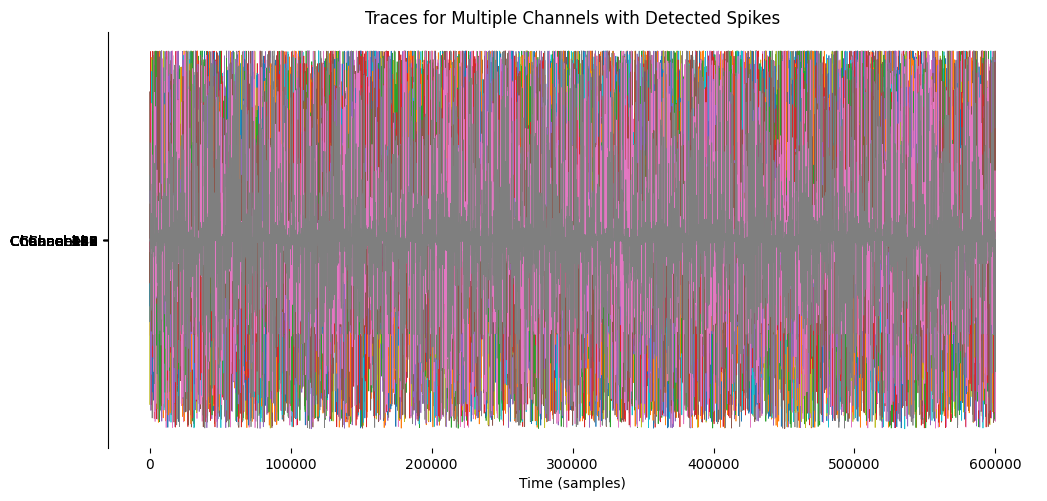

In [11]:
import os

import numpy as np
import matplotlib.pyplot as plt

plt.close('all')  # Close all existing figures to prevent multiple plots

# Define the detect_peaks_stddev function
def detect_peaks_stddev(trace, peak_sign, std_multiplier):
    """
    Detect peaks in a signal based on standard deviation thresholding.

    Parameters:
    - trace: 1D numpy array, the signal to analyze
    - peak_sign: str, "pos" for positive peaks, "neg" for negative peaks
    - std_multiplier: float, the threshold multiplier for peak detection

    Returns:
    - peaks: numpy array, indices of detected peaks
    - threshold: float, the threshold value used for detection
    """
    mean = np.mean(trace)
    std = np.std(trace)
    threshold = mean + std_multiplier * std if peak_sign == "pos" else mean - std_multiplier * std

    if peak_sign == "pos":
        peaks = np.where((trace[1:-1] > trace[:-2]) & (trace[1:-1] > trace[2:]) & (trace[1:-1] > threshold))[0] + 1
    elif peak_sign == "neg":
        peaks = np.where((trace[1:-1] < trace[:-2]) & (trace[1:-1] < trace[2:]) & (trace[1:-1] < threshold))[0] + 1
    else:
        raise ValueError("peak_sign must be 'pos' or 'neg'")

    return peaks, threshold
%matplotlib inline
# Ensure channels_to_plot only contains valid indices within the bounds of the traces array
channels_to_plot = list(map(int, ['1', '3', '5', '13', '25', '33', '134', '146', '150', '183', '209', '225', '262', '399', '442', '457', '458', '682']))
fs = recordingB.get_sampling_frequency()
start_time = 40 # Start time in seconds
end_time = 100 # End time in seconds
# Get traces for the specified range
traces = recordingB.get_traces(start_frame=int(start_time*fs), end_frame=int(end_time*fs), segment_index=0)

# Define the channels you want to plot
 # Replace with the desired channel indices
#channels_to_plot = range(traces.shape[1])  # Example channel indices
# Parameters for spike detection
peak_sign = "neg"  # Detect negative peaks
std_multiplier = 4 # Threshold: 1 standard deviation from the mean
# Adjust figure height dynamically based on the number of channels
plt.figure(figsize=(12, len(channels_to_plot) * 0.3))  # Increase height for better spacing

# Extract channel IDs and 2D location coordinates
channel_ids = np.array([int(x) for x in recordingB.get_channel_ids()])
locs = recording_chunk.get_channel_locations()  # Define locs here
# Ensure channels_to_plot only contains valid indices within the bounds of the traces array
channels_to_plot_indices = [np.where(channel_ids == ch)[0][0] for ch in channels_to_plot if ch in channel_ids]

# Loop through the channels and plot each
yticks_positions = []  # Store y-axis positions for labeling
yticks_labels = []  # Store channel names for labeling

spike_times_channel = {}  # Store spike times for each channel
for i, channel_idx in enumerate(channels_to_plot_indices):
    # Get the trace for the current channel
    trace = traces[:, channel_idx]
    
    # Detect peaks using the detect_peaks function
    peaks_sample_inds, _ = detect_peaks_stddev(trace, peak_sign, std_multiplier)

    # Convert peaks_sample_inds to integers
    peaks_sample_inds = peaks_sample_inds.astype(int)
    spike_times_channel[channel_ids[channel_idx]] = peaks_sample_inds  # Store spike times for the channel

    spike_marker_offset = 100
    
    # Plot the trace with increased spacing
    plt.plot(
        trace + i * 200,  # Increase the offset to 200 for better spacing
        label=f'Channel {channel_ids[channel_idx]}',  # Use the actual channel ID for labeling
        rasterized=True,  # Rasterize the line plots for faster rendering
        linewidth=0.5  # Use thinner lines for better performance
    )
    
    # Mark the detected spikes with red triangles
    plt.plot(
        peaks_sample_inds, 
        trace[peaks_sample_inds] + i * 200 + spike_marker_offset,  # Match the increased offset
        'rv',  # Red triangles
        markersize=4, 
        label=f'Spikes Channel {channel_ids[channel_idx]}'
    )
    
    # Add y-axis tick position and label
    yticks_positions.append(i * 200)
    
    # Retrieve the x, y coordinates for the channel
    x, y = locs[channel_idx]  # Use the index to get the location
    yticks_labels.append(f'Channel {channel_ids[channel_idx]}')  # Format with coordinates

# Customize the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time (samples)')
plt.title('Traces for Multiple Channels with Detected Spikes')

# Add y-axis ticks with channel names and coordinates
plt.yticks(yticks_positions, yticks_labels)

# Save the plot as a PDF
# output_path = './savetraces_multiple_channels_with_spikes.pdf'  # Replace with your desired path
plt.show() 
# plt.savefig(output_path, format='pdf', bbox_inches='tight', dpi=150)  # Save with high resolution
plt.close()  # Close the plot to free memory

In [13]:
#** TESTING THE ELECTRODES MAPPING **#
# Initialize the electrodes list
electrodes = []
channel_location_dict = {}

# Get channel IDs and locations
channel_ids = recording_chunk.get_channel_ids()
locations = recording_chunk.get_channel_locations()

# Populate the electrodes list
for channel, loc in zip(channel_ids, locations):
    # Calculate electrode ID based on location
    electrode_id = 220 * int(loc[1] / 17.5) + int(loc[0] / 17.5)
    electrodes.append(electrode_id)
    channel_location_dict[channel] = electrode_id  # Map channel to electrode

# Validate the electrodes list
if len(electrodes) != len(channel_ids):
    print(f"Warning: Mismatch between number of channels ({len(channel_ids)}) and electrodes ({len(electrodes)}).")
else:
    print(f"Successfully mapped {len(electrodes)} electrodes.")

Successfully mapped 924 electrodes.


In [15]:
# Sort electrodes based on distance from reference point (0, 0)

import numpy as np
import matplotlib.pyplot as plt

# Define the reference point
reference_point = (0, 0)

# Retrieve the 2D locations of the electrodes
locs = recording_chunk.get_channel_locations()

# Calculate distances for each electrode
distances = np.sqrt((locs[:, 0] - reference_point[0])**2 + (locs[:, 1] - reference_point[1])**2)

# Sort electrodes by distance (ascending order)
sorted_indices = np.argsort(distances)
sorted_electrodes = [electrodes[idx] for idx in sorted_indices]
sorted_distances = distances[sorted_indices]


for electrode, distance in zip(sorted_electrodes, sorted_distances):
    print(f"Electrode {electrode}: {distance:.2f} μm")

# Update the order of electrodes to plot based on sorted electrodes
electrodes_to_plot_sorted = [electrode for electrode in sorted_electrodes if electrode in electrodes_to_plot]


# Validate that electrodes_to_plot_sorted is not empty
if not electrodes_to_plot_sorted:
    raise ValueError("The `electrodes_to_plot_sorted` list is empty. Ensure `electrodes_to_plot` and `electrodes` are correctly defined.")

# Plot the sorted electrodes
yticks_positions = []  # Store y-axis positions for labeling
yticks_labels = []  # Store electrode names for labeling

plt.figure(figsize=(12, len(electrodes_to_plot_sorted) * 0.3))  # Adjust figure height dynamically

spike_marker_offset = 100  # Define spike marker offset

for i, electrode in enumerate(electrodes_to_plot_sorted):
    electrode_idx_array = np.where(np.array(electrodes) == electrode)[0]
    if electrode_idx_array.size == 0:
        print(f"Warning: Electrode {electrode} not found in electrodes.")
        continue  # Skip this electrode if it is not found
    trace = traces[:, electrode_idx_array[0]]
    peaks_sample_inds, _ = detect_peaks_stddev(trace, peak_sign, std_multiplier)

    # Check if spikes are detected
    if len(peaks_sample_inds) == 0:
        print(f"Warning: No spikes detected for electrode {electrode}.")

    # Plot the trace with increased spacing
    plt.plot(
        trace + i * 200,  # Increase the offset to 200 for better spacing
        rasterized=True,  # Rasterize the line plots for faster rendering
        linewidth=0.5  # Use thinner lines for better performance
    )

    # Mark the detected spikes with red triangles
    plt.plot(
        peaks_sample_inds, 
        trace[peaks_sample_inds] + i * 200 + spike_marker_offset,  # Match the increased offset
        'rv',  # Red triangles
        markersize=4, 
        label=f'Spikes Electrode {electrodes[electrode_idx]}'
    )
    yticks_positions.append(i * 200)
    yticks_labels.append(f'Electrode {sorted_electrodes[i]} ({sorted_distances[i]:.2f} μm)')

     

# Customize the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Time (samples)')
plt.title('Traces for Multiple Channels Sorted by Distance')
plt.yticks(yticks_positions, yticks_labels)

# Save the plot as a PDF
output_path = './sorted_traces_by_distance.pdf'
plt.show()
plt.savefig(output_path, format='pdf', bbox_inches='tight', dpi=150)
plt.close()



Electrode 3225: 2549.30 μm
Electrode 3665: 2552.90 μm
Electrode 4105: 2556.98 μm
Electrode 4545: 2561.52 μm
Electrode 4985: 2566.54 μm
Electrode 5425: 2572.02 μm
Electrode 6085: 2581.12 μm
Electrode 3227: 2584.14 μm
Electrode 3667: 2587.69 μm
Electrode 6525: 2587.75 μm
Electrode 4107: 2591.71 μm
Electrode 6965: 2594.84 μm
Electrode 4547: 2596.20 μm
Electrode 4987: 2601.15 μm
Electrode 7405: 2602.39 μm
Electrode 5427: 2606.56 μm
Electrode 7845: 2610.38 μm
Electrode 6087: 2615.53 μm
Electrode 3229: 2618.98 μm
Electrode 6527: 2622.08 μm
Electrode 3669: 2622.49 μm
Electrode 8505: 2623.19 μm
Electrode 4109: 2626.46 μm
Electrode 6967: 2629.08 μm
Electrode 4549: 2630.89 μm
Electrode 8945: 2632.28 μm
Electrode 4989: 2635.77 μm
Electrode 7407: 2636.52 μm
Electrode 5429: 2641.11 μm
Electrode 9385: 2641.80 μm
Electrode 7847: 2644.41 μm
Electrode 6089: 2649.96 μm
Electrode 9825: 2651.76 μm
Electrode 3231: 2653.83 μm
Electrode 6529: 2656.43 μm
Electrode 8507: 2657.06 μm
Electrode 3671: 2657.29 μm
E

NameError: name 'electrodes_to_plot' is not defined

In [67]:
print(electrodes_to_plot)

[22783, 25426, 24341, 23885, 25204, 23229, 24121, 24561, 25439, 23449, 25658, 24339, 24340, 24554, 25211, 24320, 23002, 24319, 24761, 22782, 25861, 24104, 25438, 23224, 24774, 25879, 24985, 23228, 26088, 24770, 25437, 25659, 24120, 24105, 24336, 23448, 24559, 25868, 25877, 25657, 24555, 24335, 23886, 22784, 24984, 26310, 23222, 25641, 25869, 23009, 23008, 24560, 23447, 23227, 26075, 24990, 25878, 26308, 24556, 26083, 25860, 24775, 24989, 25419, 26304, 25424, 24119, 26297, 24334, 23884, 24760, 25859, 24540, 26076, 26090, 24776, 25210, 25421, 23223, 24324, 26295, 25206, 25425, 24539, 26296, 26077, 24326, 24759, 26084, 25639, 26305, 24321, 25420, 24541, 26309, 26303, 25640, 24991, 23003, 26085, 24325, 25205, 23007, 23004, 24106, 24986, 25209, 26089, 24769, 24771, 25870]


In [9]:
# Extract channel IDs and 2D location coordinates
channel_ids =np.array([int(x) for x in recording_chunk.get_channel_ids()])
locs = recording_chunk.get_channel_locations()
channel_to_highlight = electrodes_to_plot # Channels to highlight



NameError: name 'electrodes_to_plot' is not defined

In [69]:
print(channel_to_highlight)

[22783, 25426, 24341, 23885, 25204, 23229, 24121, 24561, 25439, 23449, 25658, 24339, 24340, 24554, 25211, 24320, 23002, 24319, 24761, 22782, 25861, 24104, 25438, 23224, 24774, 25879, 24985, 23228, 26088, 24770, 25437, 25659, 24120, 24105, 24336, 23448, 24559, 25868, 25877, 25657, 24555, 24335, 23886, 22784, 24984, 26310, 23222, 25641, 25869, 23009, 23008, 24560, 23447, 23227, 26075, 24990, 25878, 26308, 24556, 26083, 25860, 24775, 24989, 25419, 26304, 25424, 24119, 26297, 24334, 23884, 24760, 25859, 24540, 26076, 26090, 24776, 25210, 25421, 23223, 24324, 26295, 25206, 25425, 24539, 26296, 26077, 24326, 24759, 26084, 25639, 26305, 24321, 25420, 24541, 26309, 26303, 25640, 24991, 23003, 26085, 24325, 25205, 23007, 23004, 24106, 24986, 25209, 26089, 24769, 24771, 25870]


In [71]:
print("Number of selected electrodes:", len(electrodes_to_plot))

print(electrodes[:5])
print(type(electrodes[0]))
electrodes = electrodes.astype(int)

Number of selected electrodes: 111
[12145 13199 13431 15397 14317]
<class 'numpy.int64'>


In [14]:
# Print the number of selected electrodes
print(f"Number of selected electrodes: {(electrodes_to_plot)}")

# Function to calculate the firing rate for a given electrode
def calculate_metrics(spike_times, total_duration):
    total_spikes = len(spike_times)
    # Calculate firing rate
    firing_rate = total_spikes / total_duration if total_duration > 0 else 0

    # Calculate interspike intervals (ISI)
    interspike_intervals = np.diff(spike_times)
    mean_isi = np.mean(interspike_intervals)
    std_isi = np.std(interspike_intervals)

    # Detect bursts (example: spikes within 0.1 seconds are considered part of a burst)
    burst_threshold = 0.1  # Time in seconds
    burst_indices = np.where(interspike_intervals < burst_threshold)[0]
    num_bursts = len(burst_indices)
    spikes_per_burst = num_bursts + 1  # Each burst has at least 2 spikes
    burst_peak = np.max(interspike_intervals) if num_bursts > 0 else 0
    
    return firing_rate if total_duration > 0 else 0

# Example: Total duration of the recording in seconds
total_duration = recording_chunk.get_total_duration()

# Create a list to store the data for the table
data = []

# Iterate over the selected electrodes
for electrode in electrodes_to_plot:
    if electrode in spike_times_electrode:
        spike_times = spike_times_electrode[electrode]
        firing_rate = calculate_metrics(spike_times, total_duration)
        data.append({"Electrode": electrode, "Total Spikes": len(spike_times), "Firing Rate (Hz)": firing_rate})
    else:
        data.append({"Electrode": electrode, "Firing Rate (Hz)": "No spikes detected"})

# Create a DataFrame from the data
firing_rate_table = pd.DataFrame(data)

# Display the table
print(firing_rate_table)

firing_rate_table = pd.DataFrame(data)
firing_rate_table

# Optionally, save the table to a CSV file
firing_rate_table.to_csv("electrodes_frtable_run2well3nospicy.csv", index=False)

NameError: name 'electrodes_to_plot' is not defined